In [2]:
import numpy as np
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Define class names
class_names = ['Adolescents ASD', 'Adolescents healthy', 'Adult ASD', 'Adult healthy', 'Children ASD', 'Children_healthy']
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}

# Dataset directories
DATA_DIR = r'/content/drive/MyDrive/ASD_code/train/'  # Update your dataset path
IMAGE_SIZE = (150, 150)


In [7]:
def load_data(dataset_path):
    images = []
    labels = []

    print("Loading Data...")

    for folder in os.listdir(dataset_path):
        label = class_names_label[folder]  # Assign label based on folder name

        for file in tqdm(os.listdir(os.path.join(dataset_path, folder))):
            img_path = os.path.join(os.path.join(dataset_path, folder), file)

            # Read and preprocess image
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE)

            images.append(image)
            labels.append(label)

    images = np.array(images, dtype='float32') / 255.0  # Normalize images
    labels = np.array(labels, dtype='int32')

    return images, labels


In [8]:
images, labels = load_data(DATA_DIR)

# Split dataset into training and testing
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training Samples: {len(train_images)}")
print(f"Testing Samples: {len(test_images)}")


Loading Data...


100%|██████████| 1970/1970 [01:09<00:00, 28.52it/s] 


Training Samples: 7700
Testing Samples: 1925


In [ ]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Reduce overfitting
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       9,470,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,564,998 (36.49 MB)

 Trainable params: 9,564,998 (36.49 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = cnn_model.fit(train_images, train_labels, batch_size=32, epochs=15, validation_split=0.2)


Epoch 1/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - accuracy: 0.7285 - loss: 0.8298 - val_accuracy: 0.9968 - val_loss: 0.0087
Epoch 2/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9930 - loss: 0.0231 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 3/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9946 - loss: 0.0125 - val_accuracy: 1.0000 - val_loss: 1.4793e-04
Epoch 4/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9983 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 1.2330e-05
Epoch 5/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9987 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 1.4052e-04
Epoch 6/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.9987 - val_loss: 0.0115
Epoch 7/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9945 - loss: 0.0241 - val_accuracy: 1.0000 - val_loss: 2.9284e-04
Epoch 8/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9976 - loss

In [11]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9987 - loss: 0.0016
Test Accuracy: 0.9995


In [12]:
cnn_model.save('/content/drive/MyDrive/ASD_code/asd_cnn_model1.h5')

# Save Model Architecture as JSON
model_json = cnn_model.to_json()
with open("asd_cnn_model.json", "w") as json_file:
    json_file.write(model_json)


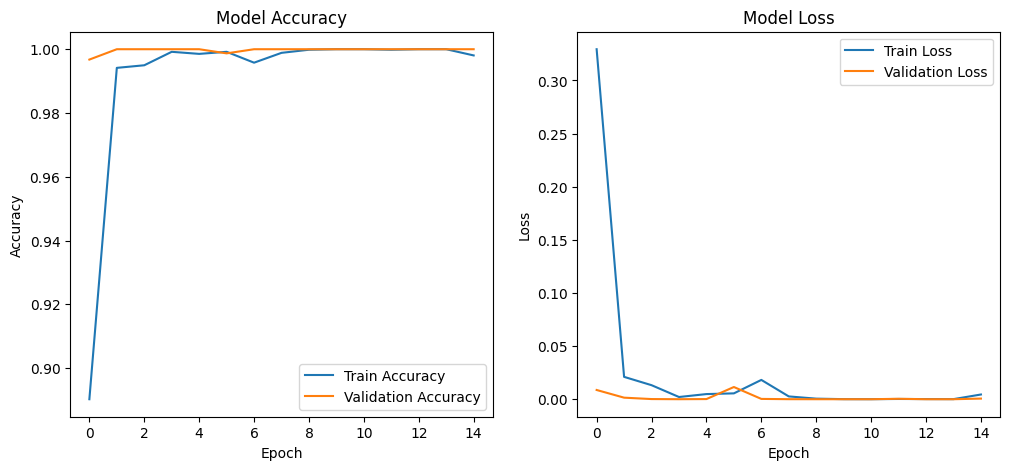

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


<ipython-input-14-1e863127cc60>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Labels', y='Feature', palette='muted')


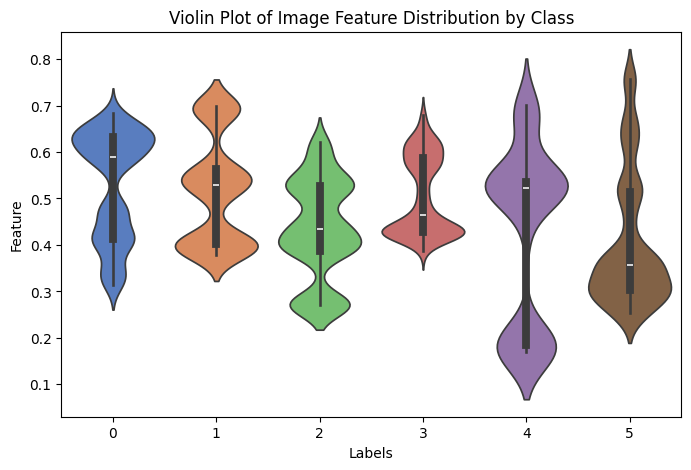

In [14]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'Labels': train_labels, 'Feature': [np.mean(img) for img in train_images]})
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Labels', y='Feature', palette='muted')
plt.title('Violin Plot of Image Feature Distribution by Class')
plt.show()


In [15]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    test_image = image.load_img(img_path, target_size=(150, 150))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize

    prediction = cnn_model.predict(test_image)
    pred_label = np.argmax(prediction, axis=1)[0]

    print(f"Predicted Class: {class_names[pred_label]}")

# Test with an image
predict_image(r'/content/drive/MyDrive/ASD_code/train/Children_healthy/image_0000001.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
Predicted Class: Children_healthy
